# Big Data Content Analytics - AUEB

## Introduction to Feed Forward Networks 

* Lab Assistant: George Perakis
* Email: gperakis[at]aeub.gr 

### Importing Modules

In [1]:
# The first time you run the project be sure to uncomment and run the installation
# of the following tensorflow version

# !pip install tensorflow

In [2]:
'''
Trains and evaluate a simple Feed Forwad Network
on the Reuters newswire topic classification task.
'''

from __future__ import print_function
import numpy as np

np.random.seed(1337)  # for reproducibility

from tensorflow.keras.datasets import reuters

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras import metrics

from pprint import pprint

import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

%matplotlib inline


### ETL Process (extract - transform - load)

In [3]:
# https://s3.amazonaws.com/text-datasets/reuters.npz
# Dataset of 11,228 newswires from Reuters, labeled over 46 topics.
# As with the IMDB dataset, each wire is encoded as a sequence of word indexes (same conventions).

In [33]:
# define the vocabulary
max_words = 2000

print('Loading data...')

# load the features and splitting in train - test (validation)

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=max_words, test_split=0.2)

print(X_train[0])
print()
print(X_test[0])

Loading data...
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]

[1, 4, 1378, 2, 9, 697, 2, 111, 8, 25, 109, 29, 2, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 2, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [5]:
for i, row in enumerate(X_train[:10]):
    print('Row {}, Number of tokens: {}'.format(i+1, len(row)))

Row 1, Number of tokens: 87
Row 2, Number of tokens: 56
Row 3, Number of tokens: 139
Row 4, Number of tokens: 224
Row 5, Number of tokens: 101
Row 6, Number of tokens: 116
Row 7, Number of tokens: 100
Row 8, Number of tokens: 100
Row 9, Number of tokens: 82
Row 10, Number of tokens: 106


In [6]:
# When we say newswires we mean press release feeds or press release 
# distribution services
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences', end='\n\n')

print('Classes: ')
print(sorted(set(y_train)))

# print the number of total distinct classes
nb_classes = np.max(y_train) + 1

print(nb_classes, 'classes')

8982 train sequences
2246 test sequences

Classes: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
46 classes


#### Convert Sequential Data (X) to One-Hot Vectors

In [7]:
print('Vectorizing sequence data...')

tokenizer = Tokenizer(num_words=max_words)

Vectorizing sequence data...


In [8]:
# Each feature set is a multi-hot vector  
X_train = tokenizer.sequences_to_matrix(X_train, 
                                        mode='binary')

print('X_train shape:', X_train.shape)
print('X_train example:', end='\n\n')

print(X_train[0])

X_train shape: (8982, 2000)
X_train example:

[0. 1. 1. ... 0. 0. 0.]


In [9]:
X_test = tokenizer.sequences_to_matrix(X_test,
                                       mode='binary')

print('X_test shape:', X_test.shape)
print('X_test example:', end='\n\n')

print(X_test[0])

X_test shape: (2246, 2000)
X_test example:

[0. 1. 1. ... 0. 0. 0.]


### Labels Encoding 

In [10]:
print('Convert class vector to binary class matrix (for use with categorical_crossentropy)')

# to_categorical() function converts the labels to one_hot_encoding
Y_train = to_categorical(y_train, nb_classes)

Y_test = to_categorical(y_test, nb_classes)

print('Y_train shape:', Y_train.shape)

print('Y_test shape:', Y_test.shape)

Convert class vector to binary class matrix (for use with categorical_crossentropy)
Y_train shape: (8982, 46)
Y_test shape: (2246, 46)


In [11]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
Y_test.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

### Model Build and Fit

In [13]:
# Model Imports
# !pip install pydot
# !pip install graphviz
from tensorflow.keras.utils import plot_model
import pydot

In [14]:
# Some parameters that we will use:

# define the batch size
batch_size = 32

# define number of epochs
nb_epoch = 20

print('Batch size: {}'.format(batch_size))
print('Number of Epochs: {}'.format(nb_epoch))
print('Number of Classes (Labels): {}'.format(nb_classes))

Batch size: 32
Number of Epochs: 20
Number of Classes (Labels): 46


In [15]:
##### Model Setup

In [16]:
print('Building model...')
# The model that we will use is a sequential model meaning that
# each layer that we add per line will use as input the output of the 
# former layer added to the model

# define an empty sequential structure 
model = Sequential()

# add a dense layer (MLP)  (512 neurons)
model.add(Dense(512, input_shape=(max_words,)))

# use a relu activation on MLP's outputs
model.add(Activation('relu'))

# use a dropout layer with with 20% of inputs droped
# model.add(Dropout(0.2))

# add a dense layer (MLP) 
model.add(Dense(nb_classes))

# use a softmax activation on 2nd MLP's outputs
model.add(Activation('softmax'))
# we have defined the structure of the model

# print model layers' info
print(model.summary())

Building model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1024512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 1,048,110
Trainable params: 1,048,110
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
# plot_model(model,
#            to_file='reuters_model_plot.png',
#            show_shapes=True,
#            show_layer_names=True)

#### Compiling the model

In [18]:
# we compile the model 
# using categorical crossentropy as a loss function
# and stochastic gradient descend as an optimizer
# Finally we measure Mean Absolute Error and Accuracy metrics
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=[
        metrics.mae,
        metrics.categorical_accuracy
    ],
)
# we have compiled a model and it is ready to be trained

In [19]:
print('Ideally we want to find the Global Minimum of a surface like the following')
Image(url='https://blog.algorithmia.com/wp-content/uploads/2018/04/word-image-4.png')

Ideally we want to find the Global Minimum of a surface like the following


### Fitting (training) our Feed Forward Network Model

In [20]:
# We train (fit our data to) our model
history = model.fit(
    X_train,                      # features
    Y_train,                      # labels
    epochs=nb_epoch,              # numbers of epochs
    batch_size=batch_size,        # define batch size
    verbose=1,                    # the most extended verbose
    validation_split=0.1          # 90% for train and 10% for validation
)

Epoch 1/20
253/253 [==============================] - 2s 7ms/step - loss: 2.9539 - mean_absolute_error: 0.0383 - categorical_accuracy: 0.3692 - val_loss: 1.9415 - val_mean_absolute_error: 0.0287 - val_categorical_accuracy: 0.5206
Epoch 2/20
253/253 [==============================] - 1s 4ms/step - loss: 1.8098 - mean_absolute_error: 0.0267 - categorical_accuracy: 0.5575 - val_loss: 1.7161 - val_mean_absolute_error: 0.0251 - val_categorical_accuracy: 0.5918
Epoch 3/20
253/253 [==============================] - 1s 4ms/step - loss: 1.5564 - mean_absolute_error: 0.0233 - categorical_accuracy: 0.6302 - val_loss: 1.5910 - val_mean_absolute_error: 0.0233 - val_categorical_accuracy: 0.6429
Epoch 4/20
253/253 [==============================] - 1s 4ms/step - loss: 1.4436 - mean_absolute_error: 0.0217 - categorical_accuracy: 0.6679 - val_loss: 1.5037 - val_mean_absolute_error: 0.0220 - val_categorical_accuracy: 0.6696
Epoch 5/20
253/253 [==============================] - 1s 4ms/step - loss: 1.3803

In [21]:
# uncomment if you want to see detailed history information of your training
# pprint(history.history)

In [22]:
def plot_keras_history(history):
    """
    
    :param history: 
    :return: 
    """
    # the history object gives the metrics keys. 
    # we will store the metrics keys that are from the training sesion.
    metrics_names = [key for key in history.history.keys() if not key.startswith('val_')]

    for i, metric in enumerate(metrics_names):
        
        # getting the training values
        metric_train_values = history.history.get(metric, [])
        
        # getting the validation values
        metric_val_values = history.history.get("val_{}".format(metric), [])

        # As loss always exists as a metric we use it to find the 
        epochs = range(1, len(metric_train_values) + 1)
        
        # leaving extra spaces to allign with the validation text
        training_text = "   Training {}: {:.5f}".format(metric,
                                                        metric_train_values[-1])

        # metric
        plt.figure(i, figsize=(12, 6))

        plt.plot(epochs,
                 metric_train_values,
                 'b',
                 label=training_text)
        
        # if we validation metric exists, then plot that as well
        if metric_val_values:
            validation_text = "Validation {}: {:.5f}".format(metric,
                                                             metric_val_values[-1])

            plt.plot(epochs,
                     metric_val_values,
                     'g',
                     label=validation_text)
        
        # add title, xlabel, ylabe, and legend
        plt.title('Model Metric: {}'.format(metric))
        plt.xlabel('Epochs')
        plt.ylabel(metric.title())
        plt.legend()

    plt.show()

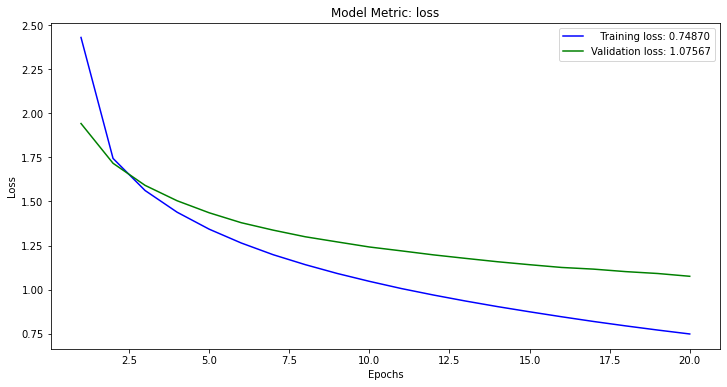

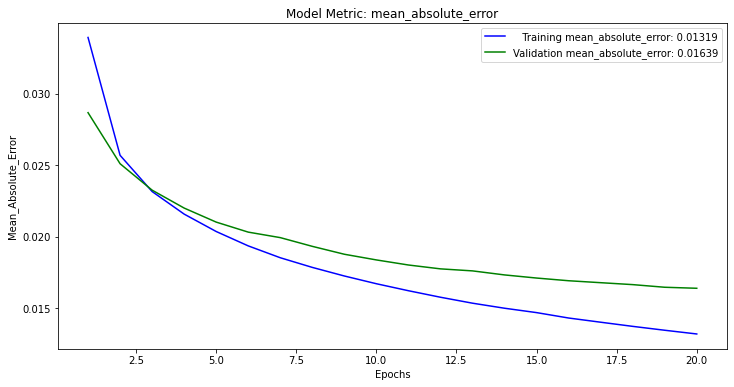

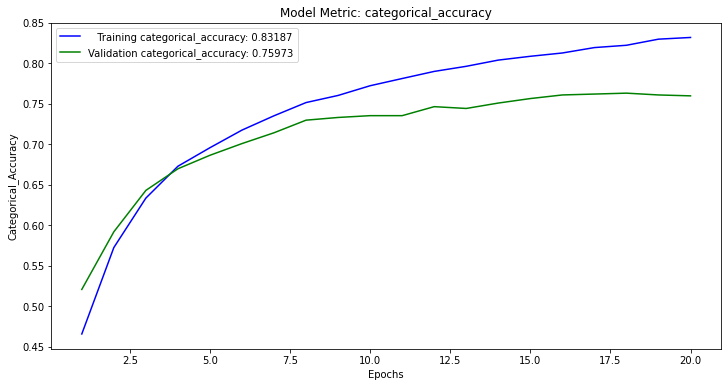

In [23]:
plot_keras_history(history)

### Model Evaluation

In [24]:
# evaluate and store on score variable
score = model.evaluate(
    X_test,                  # features
    Y_test,                  # labels
    batch_size=batch_size,   # batch size
    verbose=1                # the most extended verbose
)

# use to yield probability distribution over the categories
# model.predict_proba(np.array([X_test[0]]))[0]

# use to yield the predicted classes
# model.predict_classes(np.array([X_test[0]]))[0] == y_test[0]

print('\nTest categorical_crossentropy:', score[0])
print('\nTest mean_absolute_error:', score[1])
print('\nTest accuracy: {:.3f} %'.format(score[2]*100))

71/71 [==============================] - 0s 4ms/step - loss: 1.0243 - mean_absolute_error: 0.0157 - categorical_accuracy: 0.7649

Test categorical_crossentropy: 1.0242841243743896

Test mean_absolute_error: 0.015668313950300217

Test accuracy: 76.492 %


In [25]:
### Trial of a deeper network

In [26]:
print('Building model...')
# The model that we will use is a sequential model meaning that
# each layer that we add per line will use as input the output of the 
# former layer added to the model

dropout_rate = 0.4

# define an empty sequential structure 
model2 = Sequential()

# add a dense layer (MLP)  (512 neurons)
model2.add(Dense(512, input_shape=(max_words,)))

# use a relu activation on MLP's outputs
model2.add(Activation('relu'))

# use a dropout layer with with 40% of inputs droped
model2.add(Dropout(dropout_rate))

# add a dense layer (MLP)  (512 neurons)
model2.add(Dense(512, input_shape=(max_words,)))

# use a relu activation on MLP's outputs
model2.add(Activation('relu'))

# use a dropout layer with with 40% of inputs droped
model2.add(Dropout(dropout_rate))

# add a dense layer (MLP)  (512 neurons)
model2.add(Dense(512, input_shape=(max_words,)))

# use a relu activation on MLP's outputs
model2.add(Activation('relu'))

# use a dropout layer with with 40% of inputs droped
model2.add(Dropout(dropout_rate))

# add a dense layer (MLP) 
model2.add(Dense(nb_classes))

# use a softmax activation on 2nd MLP's outputs
model2.add(Activation('softmax'))
# we have defined the structure of the model

# print model layers' info
print(model2.summary())

Building model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               1024512   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 

In [27]:
# plot_model(model2,
#            to_file='reuters_deeper_model_plot.png',
#            show_shapes=True,
#            show_layer_names=True)

In [28]:
# we compile the model 
# using categorical crossentropy as a loss function
# and stochastic gradient descend as an optimizer
# Finally we measure Mean Absolute Error and Accuracy metrics
model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['categorical_accuracy'],
)
# we have compiled a model and it is ready to be trained

In [29]:
# We train (fit our data to) our model
history = model2.fit(
    X_train,                      # features
    Y_train,                      # labels
    epochs=nb_epoch,              # numbers of epochs
    batch_size=batch_size,        # define batch size
    verbose=1,                    # the most extended verbose
    validation_split=0.1          # 90% for train and 10% for validation
)

Epoch 1/20
253/253 [==============================] - 2s 7ms/step - loss: 1.9207 - categorical_accuracy: 0.5398 - val_loss: 1.1916 - val_categorical_accuracy: 0.7275
Epoch 2/20
253/253 [==============================] - 1s 6ms/step - loss: 0.9794 - categorical_accuracy: 0.7677 - val_loss: 1.0371 - val_categorical_accuracy: 0.7709
Epoch 3/20
253/253 [==============================] - 1s 6ms/step - loss: 0.7444 - categorical_accuracy: 0.8195 - val_loss: 0.9857 - val_categorical_accuracy: 0.7853
Epoch 4/20
253/253 [==============================] - 1s 6ms/step - loss: 0.5445 - categorical_accuracy: 0.8614 - val_loss: 1.0027 - val_categorical_accuracy: 0.7853
Epoch 5/20
253/253 [==============================] - 1s 6ms/step - loss: 0.4486 - categorical_accuracy: 0.8897 - val_loss: 1.0141 - val_categorical_accuracy: 0.7875
Epoch 6/20
253/253 [==============================] - 1s 6ms/step - loss: 0.3736 - categorical_accuracy: 0.9052 - val_loss: 1.0589 - val_categorical_accuracy: 0.7864
Epoc

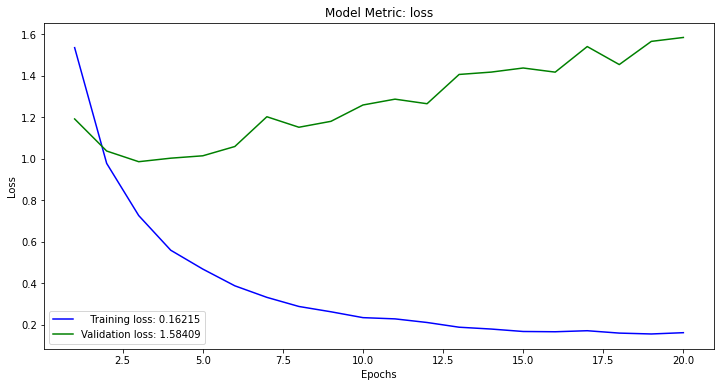

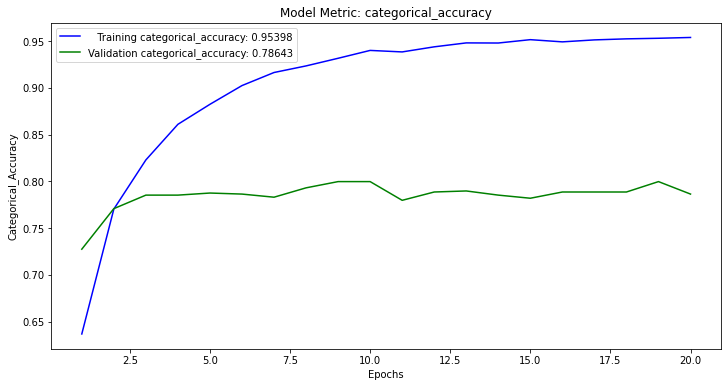

In [30]:
plot_keras_history(history)

In [31]:
# evaluate and store on score variable
score2 = model2.evaluate(
    X_test,                  # features
    Y_test,                  # labels
    batch_size=batch_size,   # batch size
    verbose=1                # the most extended verbose
)

# use to yield probability distribution over the categories
# model.predict_proba(np.array([X_test[0]]))[0]

# use to yield the predicted classes
# model.predict_classes(np.array([X_test[0]]))[0] == y_test[0]

print('\nTest categorical_crossentropy:', score2[0])
print('\nTest accuracy: {:.3f} %'.format(score2[1]*100))

71/71 [==============================] - 0s 3ms/step - loss: 1.5957 - categorical_accuracy: 0.7907

Test categorical_crossentropy: 1.5956940650939941

Test accuracy: 79.074 %


In [32]:
Image(url= "https://www.skipprichard.com/wp-content/uploads/2016/10/bigstock-Question-Mark-114454214-583x437.jpg")